# Regrese

Nám slouží jako nástroj pomocí, kterého se snažíme vyjádřit závislosti mezi proměnnými.
Tuto závislost poté vyjádříme výjádříme křivkou.
Nejednoduším případem regrese je linarní regrese.

Pro jednoduché případy jako je linearní regrese můžeme, parametry regresní křivky spočítat analyticky.
Pro komplexnější připadný nám nezbývá nic jiného než vyžít numerické metody pro aproximaci hledaných parametrů.

Infromace byly převzaty z Stanfordské Univerzity z kurzu [CS299 - Machine Learning](https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf)

### Slovníček

Závislé proměnné:
x
TODO: doplnit definici 

Nezávislé proměnné:
y
TODO: doplnit definici

Použitá řecka písmena:

| Písmeno | název | využití                                                |
| ------- | ----- | ------------------------------------------------------ |
| Β β     | beta  |                                                        |
| Θ θ     | théta | váhy regresní funkce                                   |
| Φ φ     | phi   | loss                                                   |

## Linearní regrese

Při lineářní regresi zavislosti parametrů vyjádříme přímkou. Ukážeme si jak nalézt parametry jak analyticky tak numericky pomocí metody nejmenších čvtverců (method of least squares).


In [45]:
from matplotlib import pyplot as plt
import numpy as np

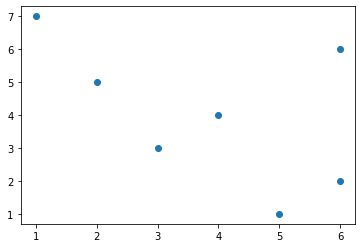

In [34]:
x = [1, 6, 2, 4, 3, 6, 5]
y = [7, 6, 5, 4, 3, 2, 1]

plt.figure();
plt.scatter(x,y)
plt.show()

O přímce můžeme uvažovat jako o polynomu pouze s dvěmi parametry a jednou závislou proměnou.

### Směrnicový zápis přímky

Jsme zvyklý na směrnicový zápis přímky: $y = kx + q$ 
$y$... je závislá proměnná, kterou získamé dosazením do rovnice
$k$... je koeficient nezávislé proměnné $x$, který nám určuje sklon přímky.
$q$... je hodnota posunu přímky na ose y


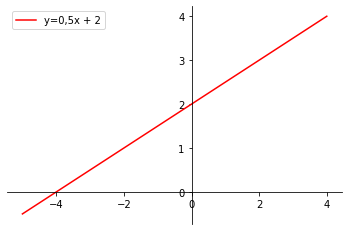

In [35]:

x = [i for i in range(-5,5)]
y = [0.5 * i +2 for i in x]

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x, y, '-r', label='y=0,5x + 2')

plt.legend(loc='upper left')
plt.show()


### Polynom

K tomuto zápisu se da docílit jednoduše z polynomu.


Kde $n$ je stupeň polynomu $n\geq 0$

$P_n(x)$ nám značí hledaný polynom.

$$
 P_n(x)=a_nx^n + a_{n-1}x^{n-1}+...+a_2x^2+a_1x^1+a_0x^0 
$$

Úmyslně jsm ponechal indexy i na posledních dvou členech polynomu $a_2x^2+a_1x^1+a_0x^0$ aby jsme si uvědomili, že se jedná o ekvivalení zápis jako $+a_2x^2+a_1x+a_0$.



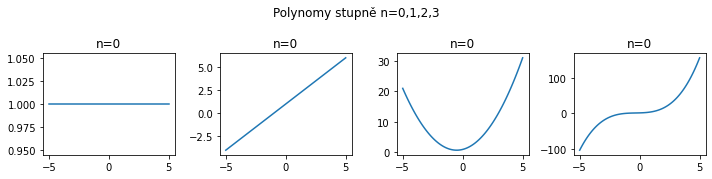

In [78]:

# uvažujeme že všechny koeficienty polynmu jsou jedna
# P3(x) = x^3 + x^2 + x + 1
x = np.linspace(-5, 5, 100)
a0 = 1.0
a1 = 1.0
a2 = 1.0
a3 = 1.0

p0 = x*0 + a0
p1 = a1*x + a0
p2 = a2*x**2 + a1*x + a0
p3 = a3*x**3 + a2*x**2 + a1*x + a0

polynoms = [p0, p1, p2, p3]

figure = plt.figure(figsize=(10, 2.5))
figure.suptitle("Polynomy stupně n=0,1,2,3")

for i, polynom in enumerate(polynoms):
    plt.subplot(1, len(polynoms), i+1)
    plt.plot(x, polynom)
    plt.title("n=0")
    plt.tight_layout()


# plt.subplot(1,4,1)
# plt.plot(x, p0)
# plt.title("n=0")
# plt.tight_layout()

# plt.subplot(1,4,2)
# plt.plot(x, p1)
# plt.title("n=1")
# plt.tight_layout()

# plt.subplot(1,4,3,)
# plt.plot(x, p2,)
# plt.title("n=2")
# plt.tight_layout()

# plt.subplot(1,4,4,)
# plt.plot(x, p3)
# plt.title("n=3")
# plt.tight_layout()

plt.show()




#### Polynom prvního stupně $n=1$
No a když si vezmeme polynom druhého stupně $n=1$. Tak dostaneme:
$$
P_1(x) = a_1x^1+a_0x^0
$$

což je ekvivalentní zjednodušenému zápisu $P_1(x) = a_1x+a_0x$ a je stejný jako směrnicový tvar přímky.


## Linearní regrese

No a linearní regrese není nic jiného než postup odhadu koeficientů $a_1$ a $a_0$

### Metoda nejmenších čtvreců
slouží jako tzv. loss funkce. To je funkce, která nám udává metriku jak dobře odpovídá náš model datům.
Obecně platí čím nižší loss tím lépe. Přesněji řečeno snažíme se minimalizovat loss.


Takto vypadá obecný předpi metody nejmenší čtverců
$$
\varphi = \sum_{i=1}^{n}{(Y_i - \hat{Y_i})^2}
$$

Když ho upravíme pro místo $Y_i$ dosadíme náš polynom prvního stupně dostaneme
$$
\varphi = \sum_{i=1}^{n}{(y_i - a_0 - a_1x_i)^2}
$$

$$
\frac{\partial{\varphi}}{\partial{a_0}} = 0
$$
$$
\frac{\partial{\varphi}}{\partial{a_1}} = 0
$$

